In [12]:
!pip install jaxlib --upgrade

Requirement already up-to-date: jaxlib in /usr/local/lib/python3.6/dist-packages (0.1.59)


In [13]:
# tensorflow_federated_nightly also bring in tf_nightly, which
# can causes a duplicate tensorboard install, leading to errors.
!pip uninstall --yes tensorboard tb-nightly

!pip install --quiet --upgrade tensorflow_federated_nightly
!pip install --quiet --upgrade nest_asyncio
!pip install --quiet tb-nightly  # or tensorboard, but not both

import nest_asyncio
nest_asyncio.apply()

Uninstalling tb-nightly-2.5.0a20210127:
  Successfully uninstalled tb-nightly-2.5.0a20210127
ERROR: tf-nightly 2.5.0.dev20210127 has requirement grpcio~=1.34.0, but you'll have grpcio 1.32.0 which is incompatible.
ERROR: tf-nightly 2.5.0.dev20210127 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.


In [14]:

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [15]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

b'Hello, World!'

In [16]:
emnist_train, emnist_test = tff.simulation.datasets.emnist.load_data()

In [17]:
print(len(emnist_train.client_ids))

emnist_train.element_type_structure

3383


OrderedDict([('label', TensorSpec(shape=(), dtype=tf.int32, name=None)),
             ('pixels',
              TensorSpec(shape=(28, 28), dtype=tf.float32, name=None))])

In [19]:
example_dataset = emnist_train.create_tf_dataset_for_client(
    emnist_train.client_ids[0])

example_element = next(iter(example_dataset))

example_element['label'].numpy()

# for printing all labels
#for i in example_dataset:
#  print(i['label'].numpy())

5

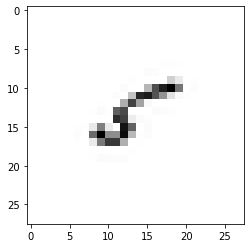

In [24]:
from matplotlib import pyplot as plt
plt.imshow(example_element['pixels'].numpy(), cmap='gray', aspect='equal')
plt.grid(False)
_ = plt.show()